In [417]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
write_path = os.getcwd() + '/Output'
corr_df = pd.read_csv(write_path + '/Corr_DF_pearson.csv')
corr_df.rename(columns = {'Unnamed: 0' : 'Country'}, inplace = True)
corr_df.set_index(corr_df.columns[0], inplace=True)

region_df = pd.read_csv(os.getcwd() + '/Databases/AuxiliarData/' + 'world-regions.csv')
region_df.drop(columns=['Code', 'Year'], inplace = True)
region_df.rename(columns = {'World Region according to the World Bank': 'Region', 'Entity': 'Country'}, inplace = True)
region_df.set_index(['Country'], inplace = True)

df = pd.read_csv(os.getcwd() + '/Output/' + 'GoldDataframe.csv')

#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['Uganda', 'Switzerland', 'Portugal', 'Mauritius', 'Congo', 'Fiji',
       'Cameroon', 'Malawi', 'Tajikistan', 'Ukraine',
       ...
       'Marshall Islands', 'Hungary', 'Maldives', 'Germany', 'Benin',
       'Belarus', 'Netherlands', 'Tonga', 'Japan', 'Sierra Leone'],
      dtype='object', name='Country', length=179)
         AgriShareGDP  CreditToAgriFishForest  EmploymentRural  TotalAgri  \
Country                                                                     
0            0.017123               -0.015759        -0.018408  -0.933236   
1           -0.195843                0.324470        -0.056454   0.153156   
2           -0.187499                0.300167        -0.275484   0.152408   
3           -0.124905                0.181528        -0.166602   0.092170   
4           -0.002218                0.233362        -0.214173  -0.199938   
...               ...                     ...              ...        ...   
174         -0.040539                0.137783        -0.1

In [418]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 250, learning_rate = 10.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)
print(new_df_tsne)

c:\Users\vperezlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


             1st_component 2nd_component
Country                                 
Uganda            0.124278     -0.067125
Switzerland       0.152554      0.005588
Portugal           0.08704      0.011183
Mauritius        -0.285986      0.066713
Congo            -0.274538      0.036349
...                    ...           ...
Belarus          -0.078849     -0.168523
Netherlands       0.133588      0.013303
Tonga             0.106954       0.01722
Japan             0.092597      0.023183
Sierra Leone       0.07765      0.035868

[179 rows x 2 columns]


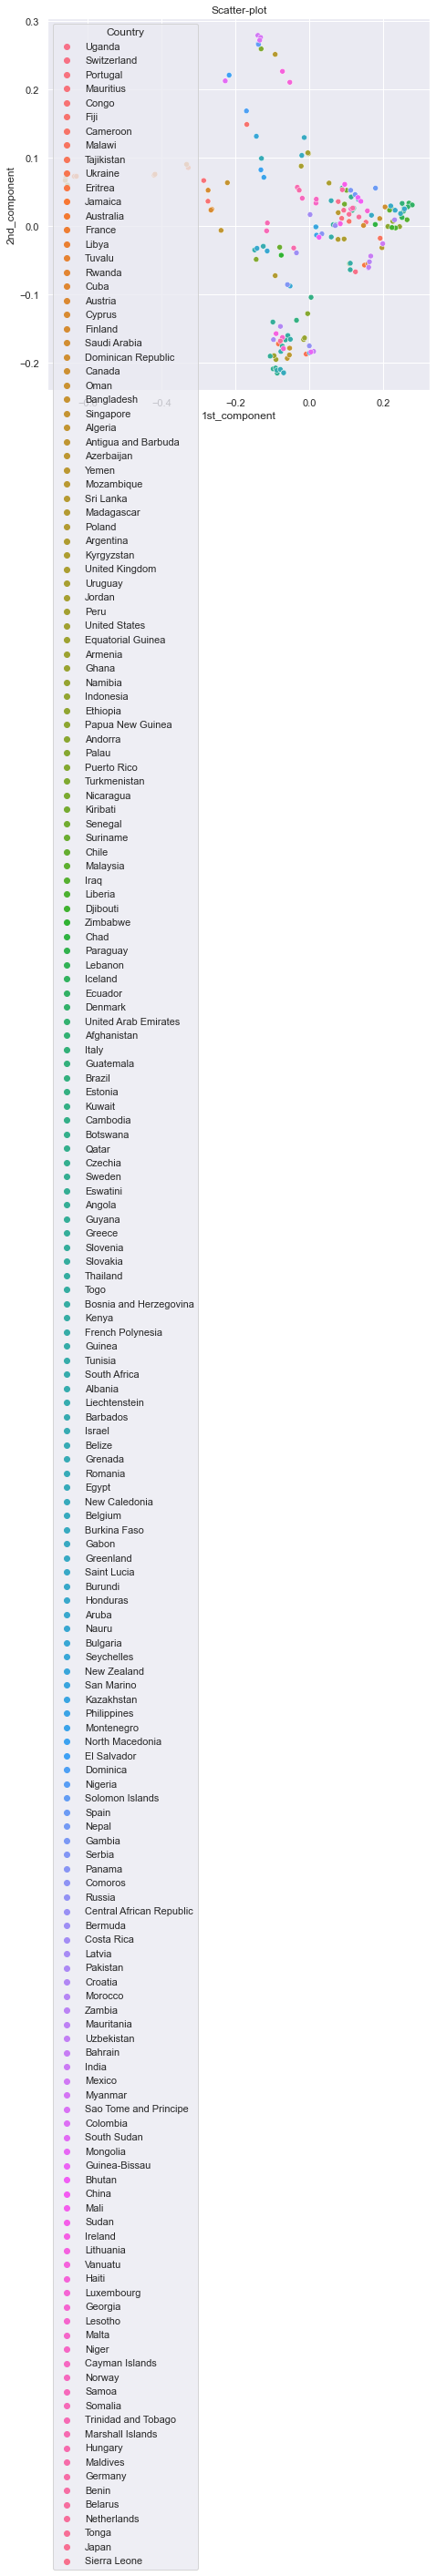

In [419]:
#plotting data

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', hue='Country')
plt.title('Scatter-plot')
plt.show()

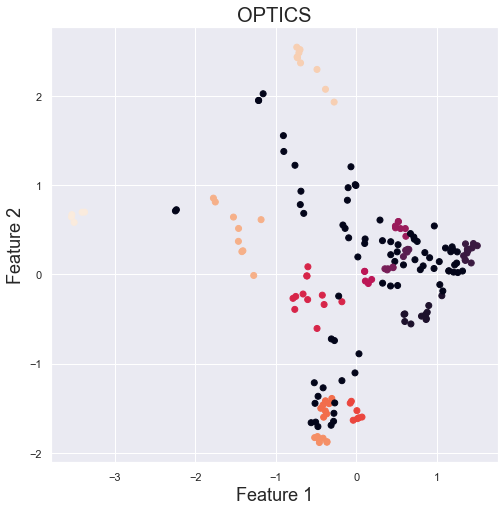

In [420]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.15, min_cluster_size=5, min_samples=5).fit(X_optics)
labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= labels_optics)


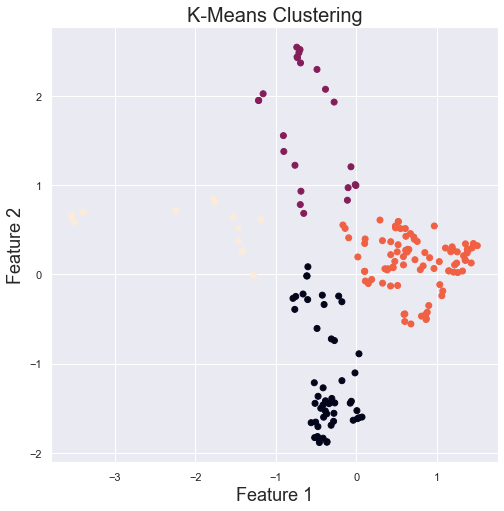

In [421]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
X_kmeans.rename(columns = {0: 'x', 1: 'y'}, inplace = True)

'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=4).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans['x'],X_kmeans['y'],c=kmean_clusters)

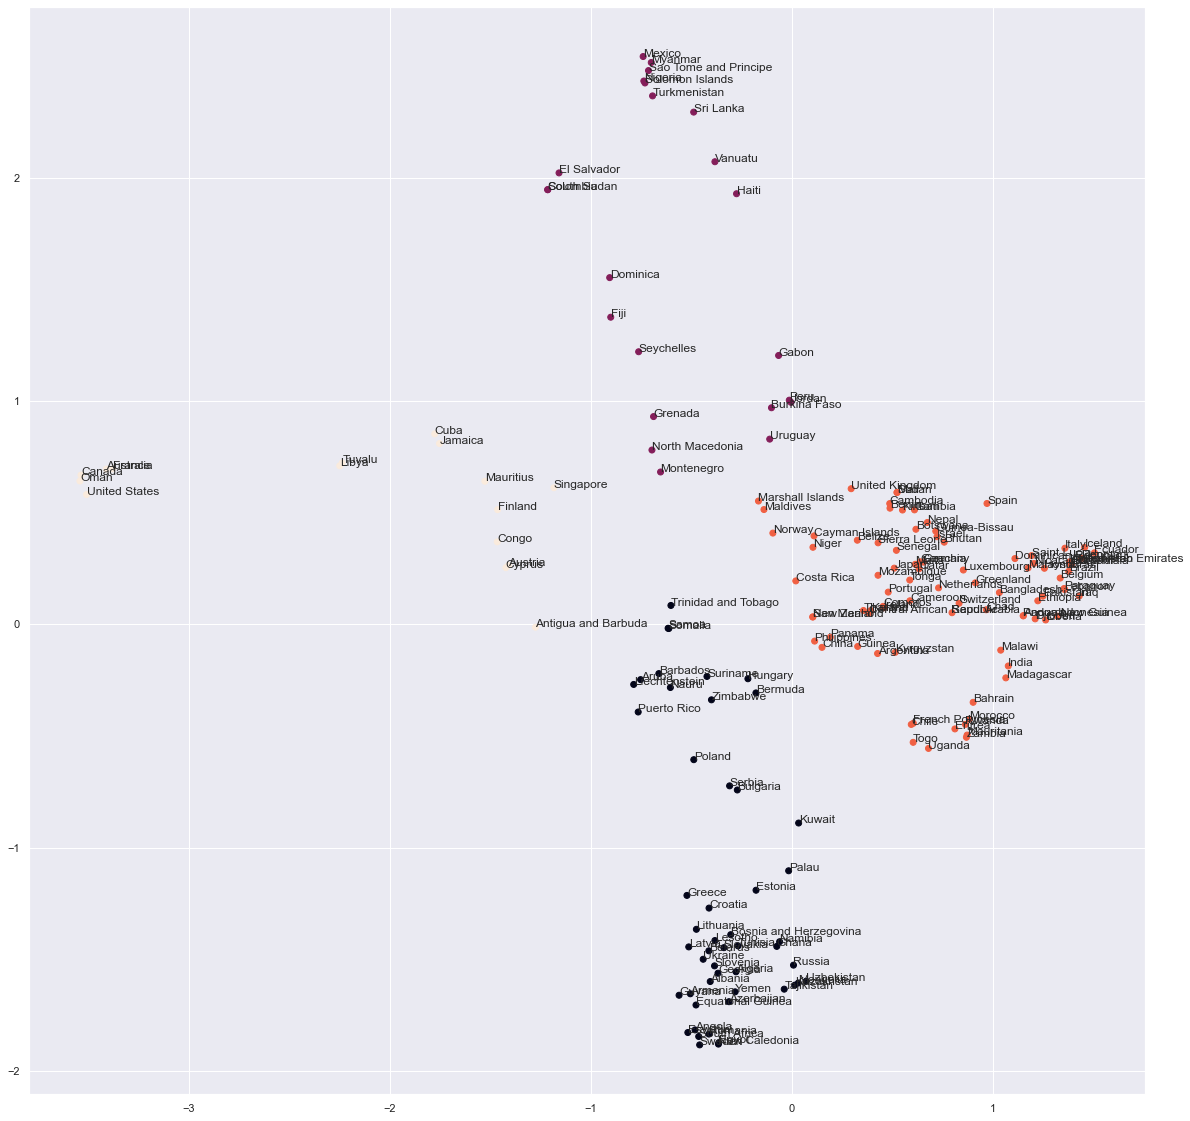

In [422]:
sns.set(rc={'figure.figsize':(20, 20)})




x = X_kmeans['x']
y = X_kmeans['y']
n = new_df_tsne.index.get_level_values(0)

fig, ax = plt.subplots()

ax.scatter(x, y, c = kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

             1st_component 2nd_component    Cluster                   Region  \
Country                                                                        
Uganda            0.124278     -0.067125  Cluster 2       Sub-Saharan Africa   
Switzerland       0.152554      0.005588  Cluster 2  Europe and Central Asia   
Portugal           0.08704      0.011183  Cluster 2  Europe and Central Asia   
Mauritius        -0.285986      0.066713  Cluster 3       Sub-Saharan Africa   
Congo            -0.274538      0.036349  Cluster 3       Sub-Saharan Africa   
...                    ...           ...        ...                      ...   
Belarus          -0.078849     -0.168523       None  Europe and Central Asia   
Netherlands       0.133588      0.013303  Cluster 2  Europe and Central Asia   
Tonga             0.106954       0.01722  Cluster 2    East Asia and Pacific   
Japan             0.092597      0.023183  Cluster 2    East Asia and Pacific   
Sierra Leone       0.07765      0.035868

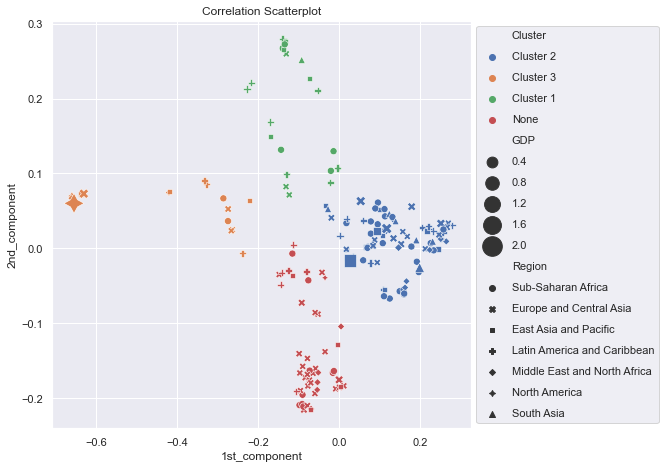

In [423]:
sns.set(rc={'figure.figsize':(7.5, 7.5)})

new_df_tsne['Cluster'] = kmean_clusters.tolist()
#new_df_tsne['Cluster'].astype(str)

cluster_list = set(new_df_tsne['Cluster'])

new_df_tsne['Cluster'].replace(to_replace = 0, value = 'None', inplace = True)

for i in cluster_list:
    new_df_tsne['Cluster'].replace(to_replace = i, value = 'Cluster ' + str(i), inplace = True)

new_df_tsne = pd.concat([new_df_tsne, region_df, df.loc[df['Year'] == 2020].set_index('Country')['GDP']], axis = 1, join = 'inner')

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', style = 'Region', hue = 'Cluster', size = 'GDP', sizes = (50, 400))

plt.legend(bbox_to_anchor=(1, 1), labelspacing = 1, loc=2)
plt.title('Correlation Scatterplot')
plt.show()

In [425]:
new_df_tsne.loc[new_df_tsne.index.get_level_values(0) == 'Australia']

,1st_component,2nd_component,Cluster,Region,GDP
Country,,,,,
Australia,-0.636016,0.072776,Cluster 3,East Asia and Pacific,1.423473e+06


In [426]:
X_kmeans[X_kmeans.index.get_level_values(0) == 'Australia']

,x,y
Country,,
Australia,-3.410074,0.695507


In [427]:
kmean_clusters

array([2, 2, 2, 3, 3, 1, 2, 2, 0, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 0, 3, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 3, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2])

In [428]:
new_df_tsne.index

Index(['Uganda', 'Switzerland', 'Portugal', 'Mauritius', 'Congo', 'Fiji',
       'Cameroon', 'Malawi', 'Tajikistan', 'Ukraine',
       ...
       'Marshall Islands', 'Hungary', 'Maldives', 'Germany', 'Benin',
       'Belarus', 'Netherlands', 'Tonga', 'Japan', 'Sierra Leone'],
      dtype='object', name='Country', length=179)

In [429]:
df_cluster = new_df_tsne.copy()
df_cluster['Cluster'] = kmean_clusters.tolist()

In [430]:
df_cluster

,1st_component,2nd_component,Cluster,Region,GDP
Country,,,,,
Uganda,0.124278,-0.067125,2,Sub-Saharan Africa,3.870222e+04
Switzerland,0.152554,0.005588,2,Europe and Central Asia,7.522480e+05
Portugal,0.08704,0.011183,2,Europe and Central Asia,2.285392e+05
Mauritius,-0.285986,0.066713,3,Sub-Saharan Africa,1.092060e+04
Congo,-0.274538,0.036349,3,Sub-Saharan Africa,1.010021e+04
...,...,...,...,...,...
Belarus,-0.078849,-0.168523,0,Europe and Central Asia,6.025886e+04
Netherlands,0.133588,0.013303,2,Europe and Central Asia,9.138654e+05
Tonga,0.106954,0.01722,2,East Asia and Pacific,4.910702e+02
